In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # Axes3D import has side effects, it enables using projection='3d' in add_subplot
from mpmath import mp

# Approximating with Deep Neural Networks

### Approximating $f(x,y) = (x^2, y(x+1))$
The constructed DNN belongs to $\mathcal{NN}^{\rho}_{2,2,2}$, has a width of 2 and uses the activation function $\rho(x)=x^2$.

In [10]:
from mpmath import mp

In [11]:
# Define I_h (as in 'activation_functions.ipynb')
rho = lambda x: x**2
d_rho = lambda x: 2*x

phi_h = lambda x: h*x + alpha
psi_h = lambda x: (x - rho(alpha))/(h*d_rho(alpha))

I_h = lambda x: psi_h(rho(phi_h(x)))

# Define functions.
eta1 = lambda x, y: I_h(x)
zeta1 = lambda x, y: rho(x+s*y+1)

eta2 = lambda x, y: rho(eta1(x,y))
zeta2 = lambda x, y: I_h(zeta1(x,y) - 2*eta1(x,y) - 1)

eta3 = lambda x, y: I_h(eta2(x,y))
zeta3 = lambda x, y: I_h((zeta2(x,y)-eta2(x,y))/(2*s))

In [12]:
# Define constants.
h = 1
s = 1
alpha = 1

x = np.linspace(-2,2)
y = np.linspace(-2,2)

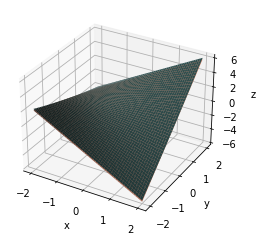

In [13]:
h = 0.0001
s = 0.1
alpha = 1

fun = lambda x, y: y*(x+1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
z_true = np.array(fun(np.ravel(X), np.ravel(Y)))
z_app = np.array(zeta3(np.ravel(X), np.ravel(Y)))
Z_true = z_true.reshape(X.shape)
Z_app = z_app.reshape(X.shape)

ax.plot_surface(X, Y, Z_true, color='darksalmon')
ax.plot_surface(X, Y, Z_app, color='darkslategrey')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [14]:
np.max(np.abs(Z_true - Z_app))

0.20717083844190753

### Approximating $f(x)=1/x$
Notice that Lemma 4.5 only guarantees convergence on $L\subseteq (0,2)$, and that there will probably be an accumulated error. Especially near 0 and 2.

In [16]:
# Machine epsilon
7./3 - 4./3 - 1

2.220446049250313e-16

6.561031507193795712703951952549678967434750419440512652897838908007390239366609237382979504274678589
4.304748402143378391436949433865951276759701485809127065882901456253822142682806957780809563125667491
1.853143819206014496309166696529094947368525944864390414363919279981188429109342366139869333593433157
0.3435205267479283086470178620643566669184597047630087635280346525653867114063194617568717427343181149
0.01194852036279972724348886289231372304454754189542025953765129116754068786132867914999423576117284886
0.0001724559218856743669201628130265241963472317024843052015835739660179302413331904466460488884488057176
0.0001585555024239971037055208376712538585974481771413241119675369294990184643070969239750389409728933163
0.0001585555012688887199741599247974387450707152060063877415234057492686767834873278498328509082213906664
0.000158555501130438868958354226147543540374471907861241949742323863670702452740229262453096024520716077
0.00015855550099198901794444019828973138154398189460424290472747

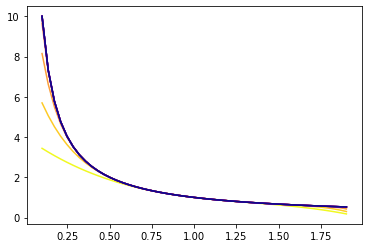

In [52]:
# Define mpfier
mpfier = mp.mpf(1)
mp.dps = 100 # Define the decimal precision.

# Initialize colors.
num_h_values = 10
cm_subset = np.linspace(1,0,num_h_values)
colors = [cm.plasma(x) for x in cm_subset]

# Initialize activation function.
rho = lambda x: x**2
d_rho = lambda x: 2*x

# Initialize constants.
h = 0.00000000000000000001
s = 0.000000000001
alpha = 1000

# Initialize first layer.
x = mpfier * np.linspace(0.1,1.9)
eta = (1-x)**2
zeta = 2-x

plt.plot(x, 1/x, color='black')

for i in range(num_h_values):
    eta_new = eta3(eta, zeta)
    zeta_new = zeta3(eta, zeta)
    
    # Test for numerical instability
    #eta_new = eta**2
    #zeta_new = zeta*(eta+1)
    
    eta = eta_new
    zeta = zeta_new

    print(np.max(np.abs(1/x - zeta)))
    
    plt.plot(x, zeta, color=colors[i])

plt.show()

6.5660405398804045
4.316247579062562
1.8705637802496256
0.3641388598884987
0.03276883513535722
0.02216810476360742
0.022163599478573492
0.022163501778947325
0.022163501778947325
0.022163501778947325


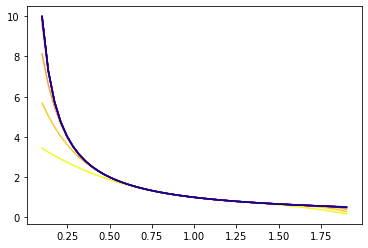

In [362]:
# Initialize colors.
num_h_values = 10
cm_subset = np.linspace(1,0,num_h_values)

colors = [cm.plasma(x) for x in cm_subset]


rho = lambda x: x**2
d_rho = lambda x: 2*x

h = 0.0000001
s = 0.00001
alpha = 1

# Initialize first layer.
x = np.linspace(0.1,1.9)

eta = (1-x)**2
zeta = 2-x

plt.plot(x, 1/x, color='black')

for i in range(num_h_values):
    eta_new = eta3(eta, zeta)
    zeta_new = zeta3(eta, zeta)
    
    # Test for numerical instability
    #eta_new = eta**2
    #zeta_new = zeta*(eta+1)
    
    eta = eta_new
    zeta = zeta_new

    print(np.max(np.abs(1/x - zeta)))
    
    plt.plot(x, zeta, color=colors[i])

plt.show()

### Illustrating the accumulated error
$I_h$ is a decent approximation to the identity function, but there is a small error and as $t$ increases we see that 
\begin{align}
E_t = \vert I(x) - (I_h)^t(x) \vert
\end{align}
increases as well. The error as a function of $t$ and $x$ is illustrated below for $h=0.1$ and $\rho(x) = x^2$.

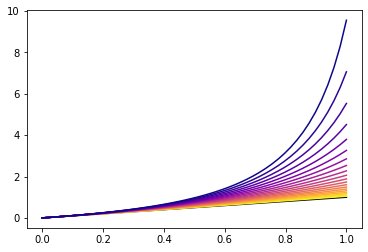

In [202]:
# Initialize colors.
num_h_values = 20
cm_subset = np.linspace(1,0,num_h_values)

colors = [cm.plasma(x) for x in cm_subset]

# Initialize values.
rho = lambda x: x**2
d_rho = lambda x: 2*x

h = 0.1
x = np.linspace(0, 1)
t = np.linspace(0, 1)

plt.plot(x, t, color='black')

for i in range(20):
    t = I_h(t)
    plt.plot(x, t, color=colors[i])